# comparing Gradient descent vs RMS prop vs Momentum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
%cd /content/drive/MyDrive/digit-recognizer

/content/drive/MyDrive/digit-recognizer


In [ ]:
df =  pd.read_csv("train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = np.array(df.iloc[: , 1:])/255

In [ ]:
Y = np.array(df.iloc[: , 0])

In [ ]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2)

## one hot encoding for softmax

In [ ]:
ytrain_ind = np.array(pd.get_dummies(ytrain))
ytest_ind = np.array(pd.get_dummies(ytest))

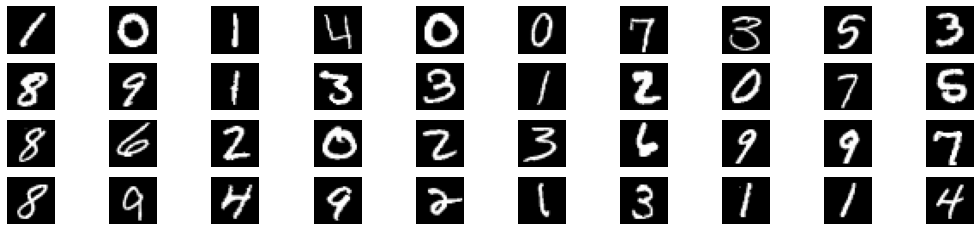

In [ ]:
plt.figure(figsize = (18 , 4))
for i in range(40):
    plt.subplot(4 ,10 , i+1)
    plt.imshow(X[i].reshape(28 ,28), cmap = "gray")
    plt.axis("off")

## decoding dummies

In [ ]:
def decode_dummies(x):
    return np.argmax(x , axis = 1)

# Code for ANN

## Activation functions

In [ ]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def relu(x):
    return (x * (x > 0))

def softmax(x):
    expA = np.exp(x)
    return (expA / expA.sum(axis = 1 , keepdims = True))

## forward propagation

In [ ]:
def forward(x , W1 ,W2 , b1 , b2):
    #z = sigmoid(x.dot(W1) + b1)
    z = relu(x.dot(W1) + b1) # relu
    #z = np.tanh(x.dot(W1) + b1) # tanh
    return z , softmax(z.dot(W2) + b2)

## Derivative of loss function with respect to W2 , b2 , W1 , b1

In [ ]:
def derivative_W2(true_t , y , z):
    return (z.T.dot(y - true_t))

def derivative_b2(true_t , y):
    return ((y - true_t).sum(axis = 0))

In [ ]:
def derivative_W1(true_t , y ,z ,  x , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(W2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0))  # relu
    return x.T.dot(dz)

def derivative_b1(true_t , y , z , W2):
    # dz = ((y - true_t).dot(W2.T) * z * (1 - z))  # sigmoid
    # dz = ((y - true_t).dot(W2.T) * (1 - z * z))  # tanh
    dz = ((y - true_t).dot(W2.T) * (z > 0))  # relu
    return dz.sum(axis = 0)

## Classification metrics

In [ ]:
def cross_entropy(true_t , y):
    return (-np.sum(true_t * np.log(y)))

def accuracy(true_t , y):
    return (np.mean(true_t == y))

## Initialize hyperparameters and weights that is common for all

In [ ]:
N , D = xtrain.shape
M = 300
K = 10

W1_0 = np.random.randn(D ,M) / np.sqrt(D + M)
b1_0 = np.random.randn(M) / np.sqrt(M)
W2_0 = np.random.randn(M ,K) / np.sqrt(M + K)
b2_0 = np.random.randn(K) / np.sqrt(K)

lr = 0.00004
reg = 0.01

batch_sz = 500
n_batches = int(N / batch_sz)

epochs = 150

# 1. Batch gradient descent

In [ ]:
W1 = W1_0.copy()
W2 = W2_0.copy()
b1 = b1_0.copy()
b2 = b2_0.copy()

cost_0 = []
acc_0 = []

In [ ]:
for i in range(epochs):
    for j  in range(n_batches):
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]

        # forward propagation

        z , y = forward(xbatch , W1 , W2 , b1 , b2)

        # update weights

        W2 -= lr * (derivative_W2(ybatch , y , z) + reg * W2) 
        b2 -= lr * (derivative_b2(ybatch , y) + reg * b2)
        W1 -= lr * (derivative_W1(ybatch , y ,z , xbatch , W2) + reg * W1)
        b1 -= lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)

        if (j % 20 == 0):
            cost = cross_entropy(ybatch , y)
            cost_0.append(cost)
            acc  = accuracy(decode_dummies(ybatch) ,decode_dummies(y))
            acc_0.append(acc)
            print(f"i - {i} -- j - {j} -- cost - {cost} -- accuracy - {acc}")


_ , pY = forward(xtrain , W1 , W2 , b1 , b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy : {acc}")
_ , pY = forward(xtest , W1 , W2 , b1 , b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy : {acc}")

i - 0 -- j - 0 -- cost - 158.9459555876004 -- accuracy - 0.11940298507462686
i - 0 -- j - 20 -- cost - 161.7040409563037 -- accuracy - 0.05970149253731343
i - 0 -- j - 40 -- cost - 153.64059203358693 -- accuracy - 0.1044776119402985
i - 0 -- j - 60 -- cost - 154.07337788325586 -- accuracy - 0.13432835820895522
i - 1 -- j - 0 -- cost - 151.44963788089524 -- accuracy - 0.19402985074626866
i - 1 -- j - 20 -- cost - 152.50372690563427 -- accuracy - 0.08955223880597014
i - 1 -- j - 40 -- cost - 147.6886724931867 -- accuracy - 0.208955223880597
i - 1 -- j - 60 -- cost - 146.95245152628485 -- accuracy - 0.26865671641791045
i - 2 -- j - 0 -- cost - 145.16722005069988 -- accuracy - 0.2537313432835821
i - 2 -- j - 20 -- cost - 145.04517306230517 -- accuracy - 0.23880597014925373
i - 2 -- j - 40 -- cost - 142.39855195505473 -- accuracy - 0.31343283582089554
i - 2 -- j - 60 -- cost - 140.55372145814255 -- accuracy - 0.373134328358209
i - 3 -- j - 0 -- cost - 139.2572014268207 -- accuracy - 0.43283

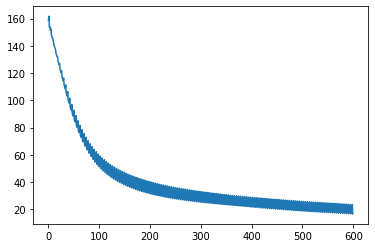

In [ ]:
plt.plot(cost_0)

# 2. RMS prop (Root Mean Square)
## This can be achieved by updating cache at each iteration
## gW = derivative_W
## cache = decay_rate * cache + (1 - decay_rate) * gW * gW
## W = W - lr*(gW / np.sqrt(cache + eps))

## Note : eps is added to avoid divide by zero

In [ ]:
W1 = W1_0.copy()
W2 = W2_0.copy()
b1 = b1_0.copy()
b2 = b2_0.copy()

cache_W2 = 0
cache_W1 = 0
cache_b2 = 0
cache_b1 = 0

decay_rate = 0.999
eps = 1e-10

cost_1 = []
acc_1 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]

        # forward propagation

        z , y = forward(xbatch , W1 , W2 , b1 , b2)

        # update weights
        gW2 = derivative_W2(ybatch , y ,z)
        cache_W2 = decay_rate*cache_W2 + (1 - decay_rate)*gW2*gW2
        W2 -= lr * (gW2 / np.sqrt(cache_W2 + eps))

        gb2 = derivative_b2(ybatch , y )
        cache_b2 = decay_rate*cache_b2 + (1 - decay_rate)*gb2*gb2
        b2 -= lr * (gb2 / np.sqrt(cache_b2 + eps))

        gW1 = derivative_W1(ybatch , y , z , xbatch , W2)
        cache_W1 = decay_rate*cache_W1 + (1 - decay_rate)*gW1*gW1
        W1 -= lr* (gW1 / np.sqrt(cache_W1 + eps))
        
        gb1 = derivative_b1(ybatch , y , z, W2)
        cache_b1 = decay_rate*cache_b1 + (1 - decay_rate)*gb1*gb1
        b1 -= lr* (gb1 / np.sqrt(cache_b1 + eps))
        
        if (j % 20 == 0):
            cost = cross_entropy(ybatch , y)
            cost_1.append(cost)
            acc  = accuracy(decode_dummies(ybatch) ,decode_dummies(y))
            acc_1.append(acc)
            print(f"i - {i} -- j - {j} -- cost - {cost} -- accuracy - {acc}")


_ , pY = forward(xtrain , W1 , W2 , b1 , b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy : {acc}")
_ , pY = forward(xtest , W1 , W2 , b1 , b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy : {acc}")

i - 0 -- j - 0 -- cost - 158.9459555876004 -- accuracy - 0.11940298507462686
i - 0 -- j - 20 -- cost - 91.75066894812474 -- accuracy - 0.7164179104477612
i - 0 -- j - 40 -- cost - 77.36694274752244 -- accuracy - 0.746268656716418
i - 0 -- j - 60 -- cost - 62.156557356214 -- accuracy - 0.7910447761194029
i - 1 -- j - 0 -- cost - 54.79564601736683 -- accuracy - 0.835820895522388
i - 1 -- j - 20 -- cost - 50.102329910999686 -- accuracy - 0.8059701492537313
i - 1 -- j - 40 -- cost - 51.127723863003304 -- accuracy - 0.8208955223880597
i - 1 -- j - 60 -- cost - 44.710802276975244 -- accuracy - 0.8507462686567164
i - 2 -- j - 0 -- cost - 40.086179687917024 -- accuracy - 0.8955223880597015
i - 2 -- j - 20 -- cost - 39.69578208604615 -- accuracy - 0.835820895522388
i - 2 -- j - 40 -- cost - 41.655435873822974 -- accuracy - 0.8507462686567164
i - 2 -- j - 60 -- cost - 37.037688875415576 -- accuracy - 0.8955223880597015
i - 3 -- j - 0 -- cost - 33.75590415504381 -- accuracy - 0.8805970149253731
i

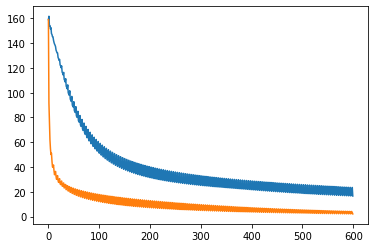

In [ ]:
plt.plot(cost_0 , label = "gradient descent")
plt.plot(cost_1 , label = "rms prop")

# 3.Momentum
## This can be achieved by adding a velocity parameter and updating them at each iteration

## W = W + dw
## dw = mu * dw - (lr * (derivative_W + reg * W))

## Note : if we assign mu = 0 then it would be normal batch gradient desccent# Momemtum

In [ ]:
# using same initial weights
W1  = W1_0.copy()
b1  = b1_0.copy()
W2  = W2_0.copy()
b2  = b2_0.copy()

mu = 0.9
dW2 = 0
dW1 = 0
db2 = 0
db1 = 0

costs_2 = []
acc_2 = []

In [ ]:
for i in range(epochs):
    for j in range(n_batches):
        # converts to batches
        xbatch = xtrain[j*n_batches : (j*n_batches + n_batches)]
        ybatch = ytrain_ind[j*n_batches : (j*n_batches + n_batches)]
        
        # forward propagation
        z , y = forward(xbatch , W1 , W2 , b1 ,b2)

        # gradient descent with momentum
 

        dW2 = mu * dW2 - lr * (derivative_W2(ybatch , y , z) + reg * W2)
        W2 += dW2

        db2 = mu * db2 - lr * (derivative_b2(ybatch , y ) + reg * b2)
        b2 += db2

        dW1 = mu * dW1 - lr * (derivative_W1(ybatch , y , z , xbatch , W2) + reg * W1)
        W1 += dW1 

        db1 = mu * db1 - lr * (derivative_b1(ybatch , y , z , W2) + reg * b1)
        b1 += db1
         

        if (j % 20 == 0 ):
            cost = cross_entropy(ybatch , y)
            costs_2.append(cost)
            acc = accuracy(decode_dummies(ybatch) , decode_dummies(y))
            acc_2.append(acc)

            print(f"i = {i} -- j = {j} -- cost - {cost} -- accuracy - {acc}")

_ ,pY =  forward(xtrain , W1 , W2 , b1 ,b2)
acc = accuracy(ytrain , decode_dummies(pY))
print(f"train accuracy -- {acc}")
_ ,pY =  forward(xtest , W1 , W2 , b1 ,b2)
acc = accuracy(ytest , decode_dummies(pY))
print(f"test accuracy -- {acc}")


i = 0 -- j = 0 -- cost - 158.9459555876004 -- accuracy - 0.11940298507462686
i = 0 -- j = 20 -- cost - 147.91913365080623 -- accuracy - 0.13432835820895522
i = 0 -- j = 40 -- cost - 132.97062667491184 -- accuracy - 0.44776119402985076
i = 0 -- j = 60 -- cost - 114.31852776790947 -- accuracy - 0.7164179104477612
i = 1 -- j = 0 -- cost - 108.4925611544299 -- accuracy - 0.746268656716418
i = 1 -- j = 20 -- cost - 93.37746305488706 -- accuracy - 0.746268656716418
i = 1 -- j = 40 -- cost - 86.86474989185913 -- accuracy - 0.6567164179104478
i = 1 -- j = 60 -- cost - 70.39492545416766 -- accuracy - 0.8059701492537313
i = 2 -- j = 0 -- cost - 66.02819759276193 -- accuracy - 0.7910447761194029
i = 2 -- j = 20 -- cost - 59.56237148216393 -- accuracy - 0.7910447761194029
i = 2 -- j = 40 -- cost - 61.60740533468907 -- accuracy - 0.7761194029850746
i = 2 -- j = 60 -- cost - 50.54405884949232 -- accuracy - 0.835820895522388
i = 3 -- j = 0 -- cost - 46.465234288410386 -- accuracy - 0.8059701492537313

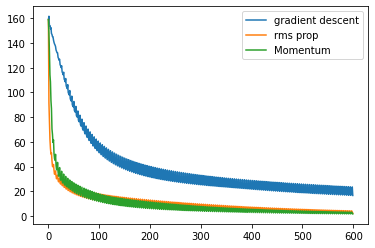

In [ ]:
plt.plot(cost_0 , label = "gradient descent")
plt.plot(cost_1 , label = "rms prop")
plt.plot(costs_2 , label = "Momentum")
plt.legend()

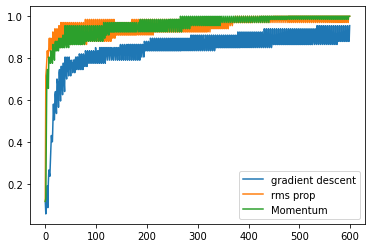

In [ ]:
plt.plot(acc_0 , label = "gradient descent")
plt.plot(acc_1 , label = "rms prop")
plt.plot(acc_2 , label = "Momentum")
plt.legend()

# Conclusion :
## Both RMS prop and Momentum performed better than Normal gradient descent
## If we look closely RMS prop decreased cost slightly faster than Momentum